# Análise da epidemia de Coronavírus

In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Carregamento e Limpeza


In [214]:
df = pd.read_csv(r'C:\Users\joao-\Desktop\Python\Datasets\2019_nCoV_data.csv')

In [215]:
df.head(500)

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,1/22/2020 12:00,Anhui,China,1/22/2020 12:00,1.0,0.0,0.0
1,2,1/22/2020 12:00,Beijing,China,1/22/2020 12:00,14.0,0.0,0.0
2,3,1/22/2020 12:00,Chongqing,China,1/22/2020 12:00,6.0,0.0,0.0
3,4,1/22/2020 12:00,Fujian,China,1/22/2020 12:00,1.0,0.0,0.0
4,5,1/22/2020 12:00,Gansu,China,1/22/2020 12:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
495,496,1/31/2020 19:00,NaN,Spain,1/31/2020 19:00,1.0,0.0,0.0
496,497,1/31/2020 19:00,NaN,UK,1/31/2020 19:00,2.0,0.0,0.0
497,498,2020-01-02 23:00:00,Hubei,Mainland China,2020-01-02 23:33:00,9074.0,294.0,215.0
498,499,2020-01-02 23:00:00,Zhejiang,Mainland China,2020-02-02 02:13:00,661.0,0.0,23.0


 - Verificamos que as datas foram passadas em formatos diferentes a partir de Fevereiro, por isso, uma saída é dividir os dados para tratá-los individualmente por mês.

In [216]:
df1 = df.iloc[:497] # 22/01/2020 ->  31/01/2020
df2 = df.iloc[497:] # 01/02/2020 -> 02/02/2020

In [217]:
df1.Date = df1.Date.str.slice(0,9,1)
df2.Date = df2.Date.str.slice(0,10,1)
df1.Date = df1.Date.str.replace('1/23/20 1','1/23/2020')
df1.Date = pd.to_datetime(df1['Date'],format='%m/%d/%Y')
df2.Date = pd.to_datetime(df2['Date'],format='%Y-%d-%m')
df = pd.concat([df1,df2],ignore_index=True)

In [218]:
df.head(500)

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,China,1/22/2020 12:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,China,1/22/2020 12:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,China,1/22/2020 12:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,China,1/22/2020 12:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,China,1/22/2020 12:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
495,496,2020-01-31,NaN,Spain,1/31/2020 19:00,1.0,0.0,0.0
496,497,2020-01-31,NaN,UK,1/31/2020 19:00,2.0,0.0,0.0
497,498,2020-02-01,Hubei,Mainland China,2020-01-02 23:33:00,9074.0,294.0,215.0
498,499,2020-02-01,Zhejiang,Mainland China,2020-02-02 02:13:00,661.0,0.0,23.0


- Agora que o problema da data foi resolvido, vamos continuar com a preparação do dataframe removendo colunas desnecessárias ou redudantes.

- Em seguida, faremos um pequeno ajuste na coluna Country para considerarmos 'China' e 'Mainland China' como um único país.

- Após isso, nossos dados estarão prontos para análise exploratória !

In [219]:
df.drop(['Sno','Last Update'],axis=1 , inplace=True)
df.set_index('Date',inplace=True)
df['Country'] = df['Country'].str.replace('Mainland ','')
df['Province/State'].fillna('Desconhecido',inplace=True)
df.isna().sum()

Province/State    0
Country           0
Confirmed         0
Deaths            0
Recovered         0
dtype: int64

## Análise Exploratória

In [220]:
plt.style.use('fivethirtyeight')

- Nessa etapa, vamos procurar gerar insights e responder perguntas sobre a Epidemia do Coronavírus.

   ### Visão Geral:

- Demonstrativos da situação atual :

Total de infectados no mundo : 17317.0
Country
Australia                  17.0
Cambodia                    1.0
Canada                      4.0
China                   17116.0
Finland                     1.0
France                      6.0
Germany                    17.0
Hong Kong                  15.0
India                       2.0
Italy                       2.0
Japan                      20.0
Macau                       8.0
Malaysia                    8.0
Nepal                       1.0
Philippines                 2.0
Russia                      2.0
Singapore                  18.0
South Korea                15.0
Spain                       1.0
Sri Lanka                   1.0
Sweden                      1.0
Taiwan                     10.0
Thailand                   19.0
UK                          2.0
US                         17.0
United Arab Emirates        5.0
Vietnam                     6.0
Name: Confirmed, dtype: float64


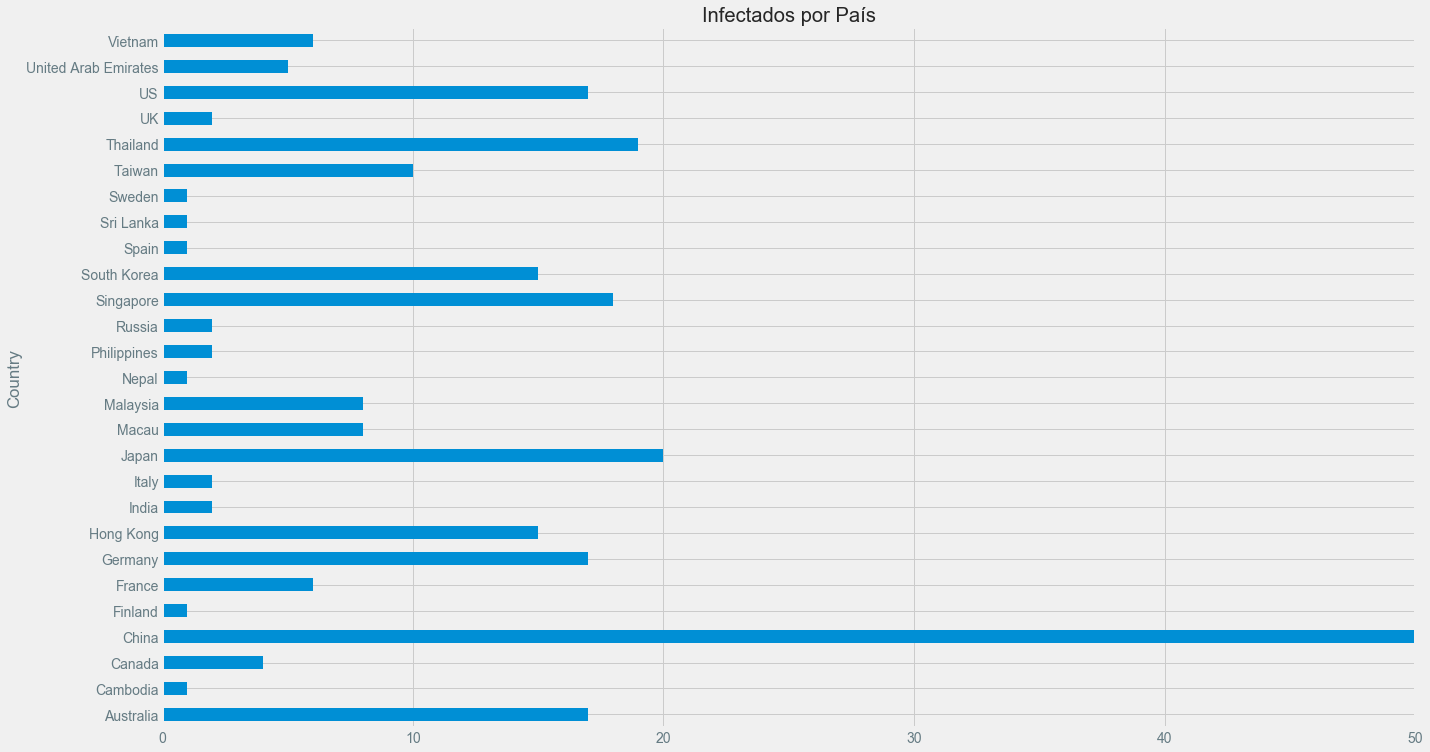

In [221]:
df_country = df.groupby(['Country','Province/State']).max()
df_country_totals = df_country['Confirmed'][df_country['Confirmed']>0].sum(level=[0,0]).droplevel(0)
print('Total de infectados no mundo : '+ str(df_country['Confirmed'][df_country['Confirmed']>0].sum()))
print(df_country_totals)
df_country_totals.plot(kind='barh',figsize=(20,12),title='Infectados por País',xlim=(0,50))

- Países com mortes confirmadas até então :

Country      Province/State
China        Beijing             1.0
             Chongqing           2.0
             Fujian              1.0
             Hainan              1.0
             Hebei               1.0
             Heilongjiang        2.0
             Henan               2.0
             Hubei             350.0
             Shandong            1.0
             Shanghai            1.0
             Sichuan             1.0
Philippines  Desconhecido        1.0
Name: Deaths, dtype: float64


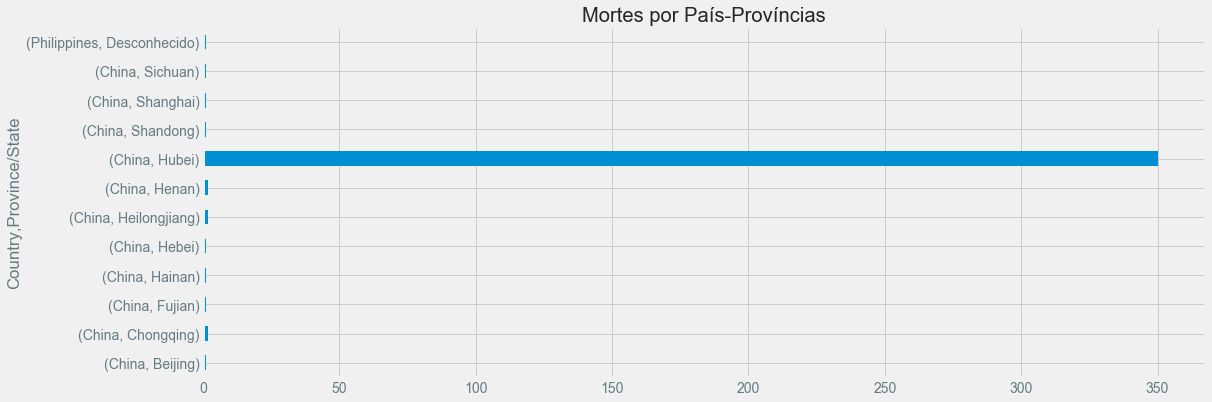

In [222]:
print(df_country['Deaths'][df_country['Deaths']>0])
df_country['Deaths'][df_country['Deaths']>0].plot(kind='barh',figsize=(16,6),title='Mortes por País-Províncias') 

- Vamos analisar mais profundamente a China(país com maior número de mortes).


Province/State
Anhui               408.0
Beijing             191.0
Chongqing           300.0
Fujian              159.0
Gansu                51.0
Guangdong           683.0
Guangxi             127.0
Guizhou              46.0
Hainan               71.0
Hebei               113.0
Heilongjiang         95.0
Henan               566.0
Hubei             11177.0
Hunan               521.0
Inner Mongolia       27.0
Jiangsu             271.0
Jiangxi             391.0
Jilin                31.0
Liaoning             70.0
Macau                 1.0
Ningxia              28.0
Qinghai              11.0
Shaanxi             116.0
Shandong            246.0
Shanghai            193.0
Shanxi               66.0
Sichuan             254.0
Taiwan                1.0
Tianjin              48.0
Tibet                 1.0
Xinjiang             24.0
Yunnan              105.0
Zhejiang            724.0
Name: Confirmed, dtype: float64


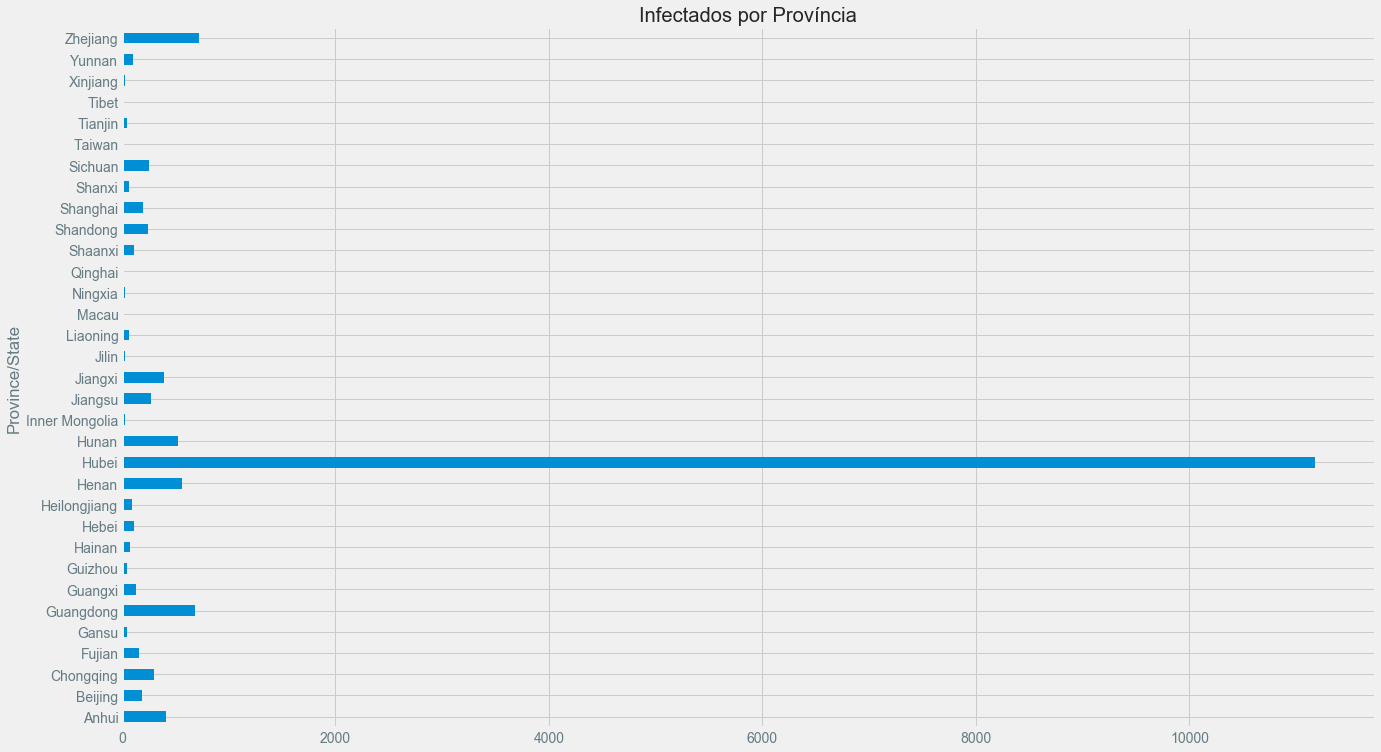

In [223]:
dfchina = df[df['Country']=='China']
china_states = dfchina.groupby('Province/State').max()
print(china_states['Confirmed'][china_states.Confirmed>0])
china_states['Confirmed'][china_states['Confirmed']>0].plot(kind='barh',figsize=(20,12),title='Infectados por Província')

Province/State
Beijing           1.0
Chongqing         2.0
Fujian            1.0
Hainan            1.0
Hebei             1.0
Heilongjiang      2.0
Henan             2.0
Hubei           350.0
Shandong          1.0
Shanghai          1.0
Sichuan           1.0
Name: Deaths, dtype: float64


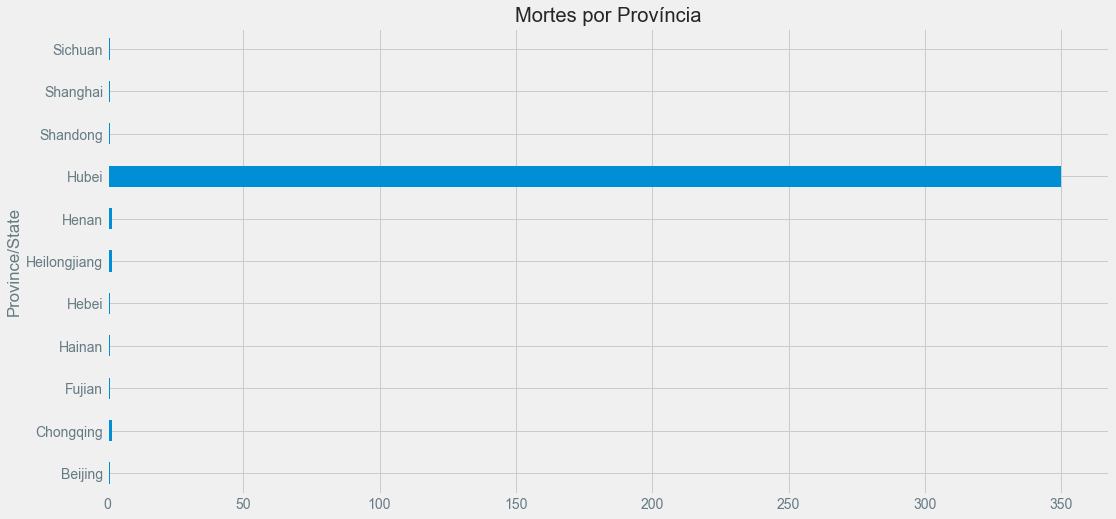

In [224]:
print(china_states['Deaths'][china_states.Deaths>0])
china_states['Deaths'][china_states['Deaths']>0].plot(kind='barh',figsize=(16,8),title='Mortes por Província')

Province/State
Beijing         0.523560
Chongqing       0.666667
Fujian          0.628931
Hainan          1.408451
Hebei           0.884956
Heilongjiang    2.105263
Henan           0.353357
Hubei           3.131431
Shandong        0.406504
Shanghai        0.518135
Sichuan         0.393701
Name: Death/Infected_Ratio, dtype: float64


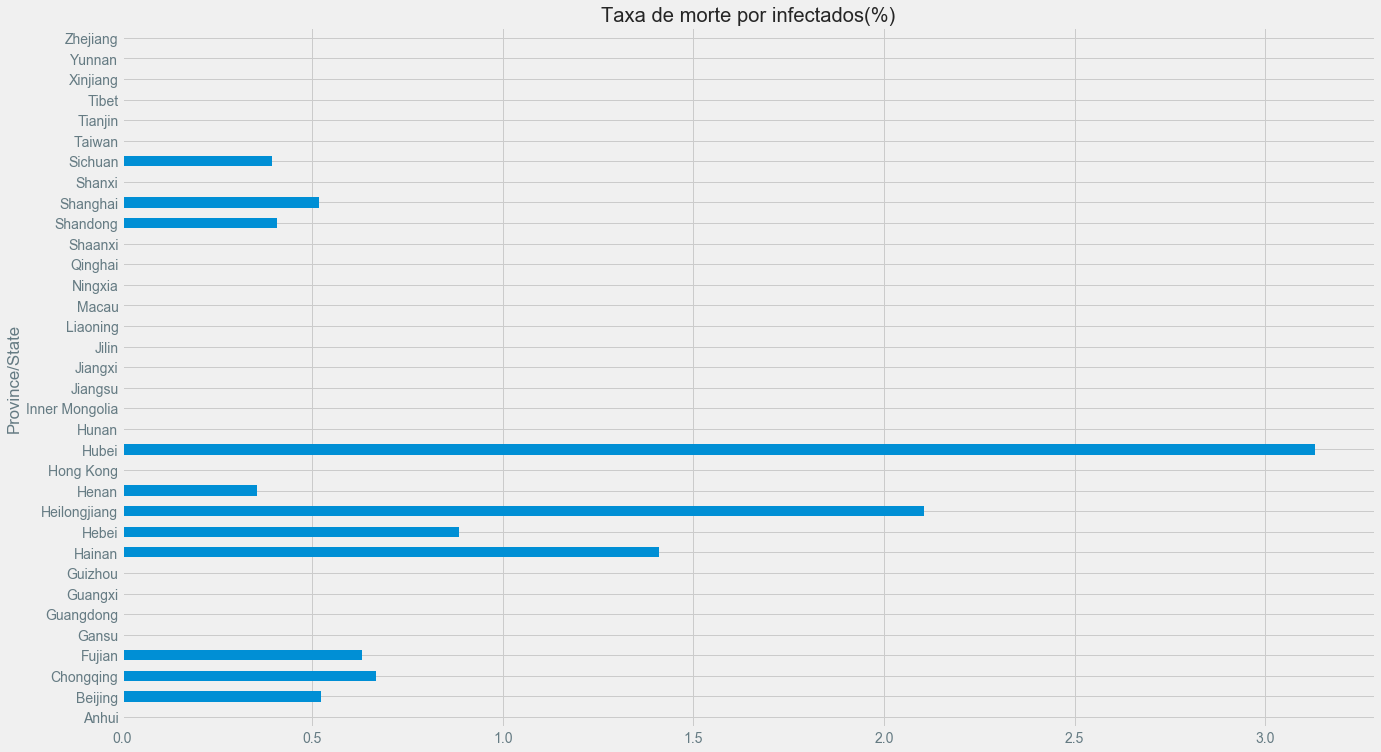

In [225]:
china_states['Death/Infected_Ratio'] = (china_states['Deaths']/china_states['Confirmed'])*100
china_states.fillna(0,inplace=True)
print(china_states['Death/Infected_Ratio'][china_states['Death/Infected_Ratio']>0])
china_states['Death/Infected_Ratio'].plot(kind='barh',figsize=(20,12),title='Taxa de morte por infectados(%)')